In [9]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [10]:
#Load dataset
iris = load_iris()
X,y = iris.data,iris.target

In [11]:
#Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
#Initialize k-NN with k=5
knn= KNeighborsClassifier(n_neighbors=5)

In [13]:
#Train (stores training data)
knn.fit(X_train,y_train)
#Predict
y_pred = knn.predict(X_test)

In [14]:
#Evaluate
print(f"Accuracy:{accuracy_score(y_test,y_pred):.3f}")
print(classification_report(y_test,y_pred,target_names=iris.target_names))

Accuracy:1.000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

In [16]:
#Create a simple linearly separable dataset
X,y = datasets.make_blobs(n_samples=10,centers=2,random_state=42,cluster_std=1.0)

#2. Train linear SVM
clf = SVC(kernel='linear',C=1.0)
clf.fit(X,y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
#Print model parameters
print("Coefficients (w):",clf.coef_)
print("Intercept (b):", clf.intercept_)
print("Support Vectors:\n",clf.support_vectors_)

Coefficients (w): [[ 0.20355574 -0.16623457]]
Intercept (b): [0.64194141]
Support Vectors:
 [[-2.26723535  7.10100588]
 [ 3.62704772  2.28741702]]


In [18]:
#Predict for a new sample
new_point=[[2,5]]
prediction=clf.predict(new_point)
print(f"Prediction for {new_point} -> Class {prediction[0]}")

Prediction for [[2, 5]] -> Class 1


In [19]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

In [20]:
#Create a non-linearly separable dataset (two concentric circles)
X,y = datasets.make_circles(n_samples=100,factor=0.5,noise=0.1,random_state=42)

In [23]:
#Train SVM with RBF kernel
clf = SVC(kernel='rbf',C=1.0,gamma='scale')
#gamma -> Controls how far the influence of a single training point reaches.
# Low gamma -> smoother decision boundary
# High gamma -> tighter, more complex boundary (risk of overfitting)
clf.fit(X,y)

#Predict for new point
new_point=[[0.6,-0.2]]
prediction=clf.predict(new_point)
print(f"Prediction for {new_point} -> Class {prediction[0]}")

#Model details
print("Number of support vectors for each class:",clf.n_support_)

Prediction for [[0.6, -0.2]] -> Class 1
Number of support vectors for each class: [19 17]


In [24]:
from sklearn.svm import SVR
import numpy as np

In [25]:
#Sample data
X=np.array([[1],[2],[3],[4],[5],[6],[7]]).astype(float)
y=np.array([1.5,1.7,3.2,3.8,5.1,6.2,7.4])

In [ ]:
#Create and fit SVR model
#kernel -> 'linear' -> fits a straight-line (or flat hyperplane) relationship.

svr = SVR(kernel='linear',C=100,epsilon=0.1)
svr.fit(X,y)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [27]:
#Predictions
X_test = np.array([[1.5],[3.5],[6.5]])
predictions = svr.predict(X_test)
print('Predictions:',predictions)

Predictions: [1.525 3.625 6.775]


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [29]:
#Load Iris dataset
iris = load_iris()
X = iris.data #features
y = iris.target #target classes (0,1,2)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [31]:
#Create DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini' #splitting criterion (gini impurity)
                             ,max_depth=3, #maximum depth of tree
                             random_state=42
                             )

In [32]:
#Train the classifier
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred = clf.predict(X_test)

In [35]:
#Evaluate
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



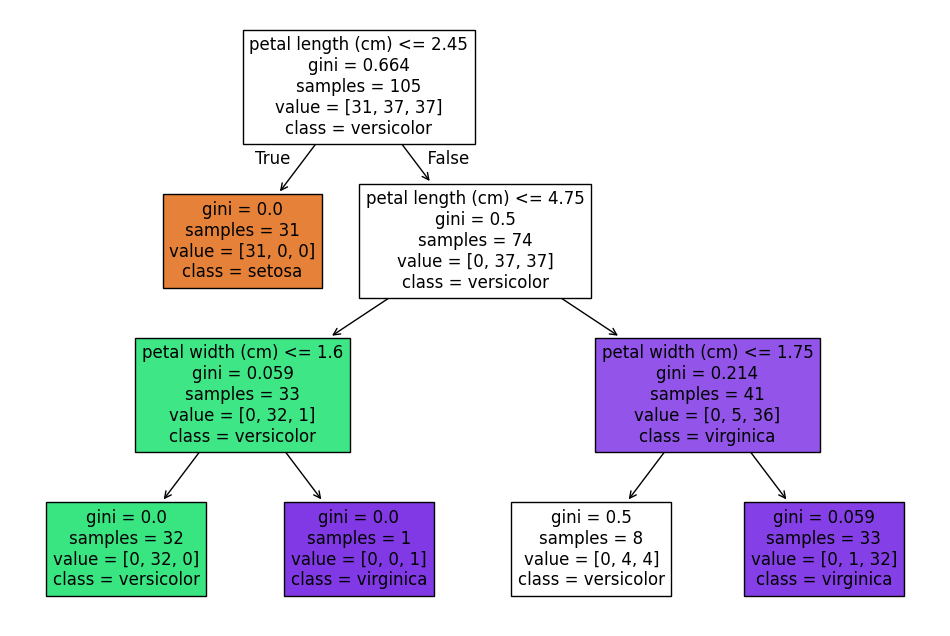

In [37]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [39]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

In [ ]:
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train,y_train)
print('Accuracy (full tree):',clf_full.score(X_test,y_test))

Accuracy (full tree): 1.0


In [42]:
#Compute cost-complexity pruning path
path = clf_full.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas #candidate alpha values
print("Candidate alpha values:",ccp_alphas)

Candidate alpha values: [0.         0.00923521 0.01269841 0.01269841 0.01847042 0.02705804
 0.25028684 0.31210884]


In [43]:
#Train Trees with Different alpha values
#Example: prune with alpha=0.01
alpha=0.01
clf_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
clf_pruned.fit(X_train,y_train)
print("Accuracy (pruned tree):",clf_pruned.score(X_test,y_test))

Accuracy (pruned tree): 1.0


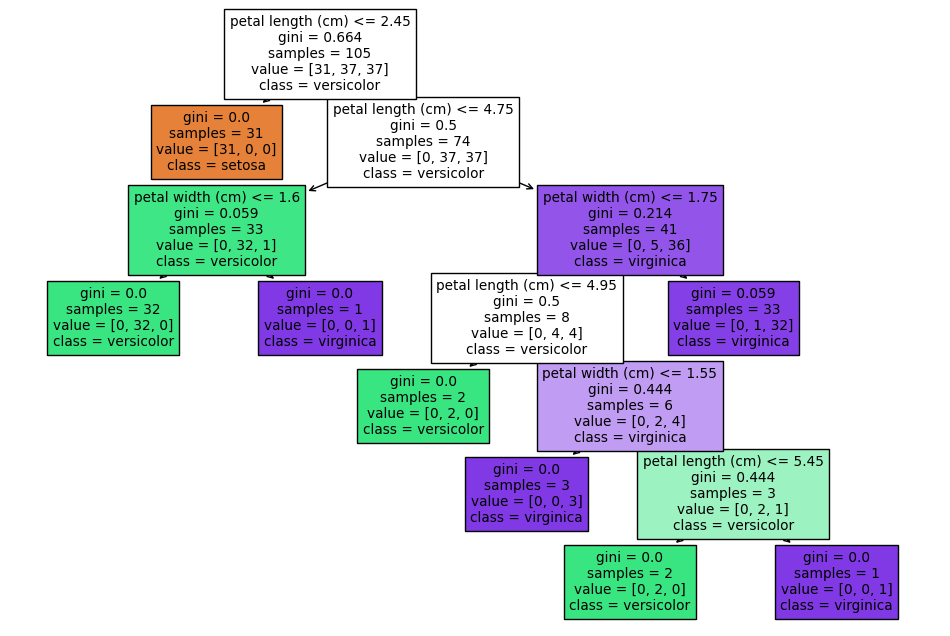

In [46]:
#Visualize pruned tree
plt.figure(figsize=(12,8))
plot_tree(clf_pruned,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [47]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [48]:
#Load sample dataset
iris = load_iris()
X = iris.data
y = iris.target

In [49]:
#Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
#Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=5, #Small number for illustration
                            max_depth=3,
                            bootstrap=True, #Use bootstrap sampling (with replacement)
                            random_state=42)

In [51]:
#Train the model
rf.fit(X_train,y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
#Check accuracy
accuracy=rf.score(X_test,y_test)
print("Test accuracy:",accuracy)

Test accuracy: 1.0


In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [54]:
#Load dataset
iris = load_iris()
X=iris.data
y=iris.target

In [55]:
#Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
#Create a Decision Tree
base_tree = DecisionTreeClassifier(max_depth=3,random_state=42)

In [58]:
#Wrap it in a Bagging classifier
bagging_model = BaggingClassifier(estimator=base_tree, #Base model
                                  n_estimators=10, #Number of trees
                                  bootstrap=True, #Sample with replacement
                                  n_jobs=-1, #Parallelize Training
                                  random_state=42)

In [59]:
#Train the bagging ensemble
bagging_model.fit(X_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [60]:
#Evaluate
accuracy = bagging_model.score(X_test,y_test)
print("Test Accuracy:",accuracy)

Test Accuracy: 1.0


In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
#Load Dataset
iris = load_iris()
X=iris.data
y=iris.target

In [63]:
#Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [64]:
#Weak learner: shallow decision tree
weak_tree = DecisionTreeClassifier(max_depth=1)

In [67]:
#Adaboost ensemble
boost_model = AdaBoostClassifier(estimator=weak_tree,n_estimators=50, # Numer of weak learners 
                                 learning_rate=1, #Step size in correction
                                 random_state=42)

In [68]:
#Train
boost_model.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [70]:
#Evaluate
accuracy = boost_model.score(X_test,y_test)
print("Test Accuracy:",accuracy)

Test Accuracy: 1.0


In [71]:
#NLP

In [72]:
#------Text Preprocessing------
import nltk

ModuleNotFoundError: No module named 'nltk'